## Information on Data:

**Goal:** Predict if people will survive.

* **gender_submission.csv**, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.


* Data definition:
<img src='resources/data_description.png' />

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

**Data Information**

In [186]:
data = pd.read_csv('data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Checking the class balance of y**

In [215]:
data['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

**Empty value check**

In [188]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<hr />

### Data Preprocessing

**Removing unnecessary features**
* Name - Person's name
* PassengerId - ID of each passenger
* Ticket - The ticket number
* Cabin - The cabin number of each passenger

In [ ]:
data.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

**Empty value check**

In [190]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

**Removing `Embarked` that is NaN**
* Only 2 rows of NaN in Embarked

In [191]:
data = data[data['Embarked'].notna()]

**Empty value check**

In [192]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

**Splitting into X & y**

In [193]:
X = data.drop('Survived', axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [194]:
y = data['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

**Filling in the `Age` missing value with `mean`**

In [195]:
# Filling in missing values
age_imputer = SimpleImputer(strategy='mean')

imputer = ColumnTransformer([
    ('age_imputer', age_imputer, ['Age'])
])

X['Age'] = imputer.fit_transform(X)

In [196]:
X.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [197]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


**Encoding `Sex` column**

In [198]:
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])

In [199]:
X.shape

(889, 7)

In [200]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare Embarked
0         3    1  22.000000      1      0   7.2500        S
1         1    0  38.000000      1      0  71.2833        C
2         3    0  26.000000      0      0   7.9250        S
3         1    0  35.000000      1      0  53.1000        S
4         3    1  35.000000      0      0   8.0500        S
..      ...  ...        ...    ...    ...      ...      ...
886       2    1  27.000000      0      0  13.0000        S
887       1    0  19.000000      0      0  30.0000        S
888       3    0  29.642093      1      2  23.4500        S
889       1    1  26.000000      0      0  30.0000        C
890       3    1  32.000000      0      0   7.7500        Q

[889 rows x 7 columns]


**Encoding `Embarked`, total of 3 types**

In [201]:
# Encoding Categorical Features
categorical_features = ['Embarked']

transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_features)
], remainder='passthrough')

X = transformer.fit_transform(X)

In [202]:
X.shape

(889, 9)

In [203]:
print(X)

[[ 0.      0.      1.     ...  1.      0.      7.25  ]
 [ 1.      0.      0.     ...  1.      0.     71.2833]
 [ 0.      0.      1.     ...  0.      0.      7.925 ]
 ...
 [ 0.      0.      1.     ...  1.      2.     23.45  ]
 [ 1.      0.      0.     ...  0.      0.     30.    ]
 [ 0.      1.      0.     ...  0.      0.      7.75  ]]


**Separating Data**

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Scaling the data - `Standardization`**

In [205]:
# Feature Scaling
sc = StandardScaler()

X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [206]:
print(X_train)

[[ 0.          0.          1.         ...  6.82104288  2.01099358
   0.73059282]
 [ 0.          0.          1.         ...  1.36472019 -0.4756437
   0.80858655]
 [ 0.          0.          1.         ...  0.45533307  0.76767494
  -0.24358836]
 ...
 [ 0.          0.          1.         ...  0.45533307 -0.4756437
  -0.33565057]
 [ 0.          0.          1.         ... -0.45405405 -0.4756437
  -0.48966351]
 [ 1.          0.          0.         ... -0.45405405 -0.4756437
   2.03542397]]


In [207]:
print(X_test)

[[ 1.          0.          0.         ...  0.45533307 -0.4756437
  -0.35728742]
 [ 0.          0.          1.         ... -0.45405405 -0.4756437
  -0.48916988]
 [ 0.          0.          1.         ... -0.45405405 -0.4756437
   0.38406372]
 ...
 [ 0.          0.          1.         ...  0.45533307 -0.4756437
   0.40578349]
 [ 0.          0.          1.         ... -0.45405405 -0.4756437
   0.008904  ]
 [ 1.          0.          0.         ...  1.36472019  0.76767494
  -0.26242927]]


<hr />

### Training the model

In [209]:
cls = XGBClassifier()
cls.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

<hr />

### Evaluations

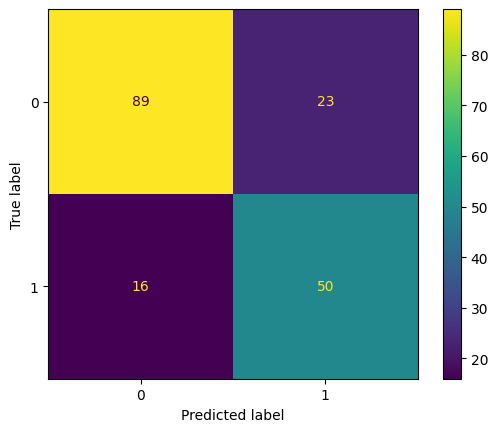

In [212]:
# Evaluations
y_preds = cls.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

In [213]:
accuracy_score(y_test, y_preds)

0.7808988764044944

In [214]:
pd.DataFrame(classification_report(y_test, y_preds, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.847619,0.684932,0.780899,0.766275,0.787297
recall,0.794643,0.757576,0.780899,0.776109,0.780899
f1-score,0.820276,0.719424,0.780899,0.769850,0.782882
support,112.000000,66.000000,0.780899,178.000000,178.000000
